# XML exercise by Robert Joseph
****
+ reference: https://docs.python.org/2.7/library/xml.etree.elementtree.html
+ data source: http://www.dbis.informatik.uni-goettingen.de/Mondial
****

In [367]:
from xml.etree import ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

****
## XML exercise

Using data in 'data/mondial_database.xml', the examples above, and refering to https://docs.python.org/2.7/library/xml.etree.elementtree.html, find

1. 10 countries with the lowest infant mortality rates
2. 10 cities with the largest population
3. 10 ethnic groups with the largest overall populations (sum of best/latest estimates over all countries)
4. name and country of a) longest river, b) largest lake and c) airport at highest elevation

In [5]:
document = ET.parse( './data/mondial_database.xml' )

# Answer 1
The 10 countries with the lowest infant mortality rates were found by creating two empty lists. The first list, name_list, was used to hold the names of the countries, while the second, mort_list, was used to hold the mortality rates. The for loop was used to iterate over the countries, and the countries with infant mortality values were appended to mort_list, along with the associated countries to name_list. The lists were then used to create a dictionary, dict1, that was in turn used in the creation of a dataframe with pandas. The dataframe was then sorted by mortality and the 10 lowest were found by calling the head function.

In [394]:
name_list = []
mort_list = []
for element in document.iterfind('country'):
    try:
        if element.find('infant_mortality').text:
            name_list.append(element.find('name').text)
            mort_list.append(float(element.find('infant_mortality').text))
            
    except (AttributeError):
        pass
dict1 = {'Country': name_list, 'Mortality': mort_list}
mort_df = pd.DataFrame.from_dict(dict1)
mort_df.sort_values(by='Mortality').head(10)


,Country,Mortality
36,Monaco,1.81
90,Japan,2.13
109,Bermuda,2.48
34,Norway,2.48
98,Singapore,2.53
35,Sweden,2.60
8,Czech Republic,2.63
72,Hong Kong,2.73
73,Macao,3.13
39,Iceland,3.15


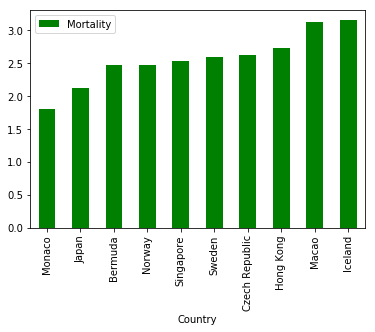

In [393]:
(mort_df.sort_values(by='Mortality').head(10)).plot.bar(x='Country',y='Mortality',color='G');
plt.show()

# Answer 2

The 10 cities with the largest population were found by creating two empty lists. The first list, city_list, was used to hold the names of the cities, while the second, pop_list, was used to hold the population values. Nested for loops were used to iterate over the countries and cities, and the cities with population values were appended to city_list, along with the associated populations to pop_list. The lists were then used to create a dictionary, dict1, that was in turn used in the creation of a dataframe with pandas. The dataframe was then sorted by population and the 10 highest were found by calling the tail function.


In [397]:
city_list = []
pop_list = []
for element in document.iterfind('country'):
    for subelement in element.getiterator('city'):
        try:
            if subelement.find('population').text:
                city_list.append(subelement.find('name').text)
                pop_list.append(int(subelement.find('population[last()]').text))
            
        except (AttributeError):
            pass
dict1 = {'City': city_list, 'Population': pop_list}
mort_df = pd.DataFrame.from_dict(dict1)
mort_df.sort_values(by='Population').tail(10)

,City,Population
977,Shenzhen,10358381
1467,Delhi,11034555
974,Guangzhou,11071424
1252,Tianjin,11090314
2594,São Paulo,11152344
1250,Beijing,11716620
443,Moskva,11979529
1421,Mumbai,12442373
707,Istanbul,13710512
1251,Shanghai,22315474


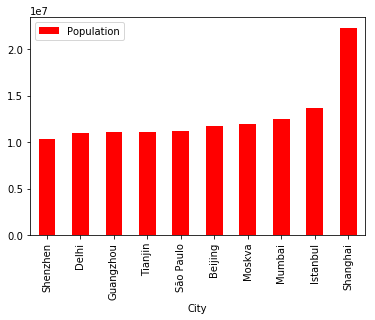

In [400]:
(mort_df.sort_values(by='Population').tail(10)).plot.bar(x='City',y='Population', color='R');
plt.show()

# Answer 3

The 10 ethnic groups with the largest overall population were found by creating four empty lists. The first list, ethnic, was used to hold ethnic groups, the second, perc, was used to hold the ethnic group's percentage, the third, ctry, was used to hold the countries, and the fourth, pop_amt, was used to hold the population of the country. The for loop was used to iterate over the countries, and the countries with ethnic group values were appended to ctry, the ethnic group was appended to ethnic, the percentage of the group was appended to perc, and the population of the country appended to pop_amt. The lists were then used to create a dictionary, dict1, that was in turn used in the creation of a dataframe with pandas. A new column was added to the dataframe, 'Ethnic Population', that was a calculation of the number of the Ethnicity's population using the 'Percentage' and 'Population' columns. A new dataframe was created where a 'groupby' was done on the 'Ethnicity' column and the 'Ethnic Population' colummn was summed over the countries, and the index reset. The values were then sorted by the 'Ethnic Population' column in descending order and the top 10 selected using head call.

In [85]:
ethnic = []
perc = []
ctry = []
pop_amt = []
for element in document.iterfind('country'):
    try:
        if element.find('ethnicgroup').text:
            for aGroup in element.findall('ethnicgroup'):
                ethnic.append(aGroup.text)
                perc.append(float(aGroup.attrib.get('percentage')))
                pop_amt.append(int(element.find('population[last()]').text))
                ctry.append(element.find('name').text)
    except (AttributeError):
        pass
    
dict1 = {'Country': ctry, 'Population': pop_amt, 'Ethnicity': ethnic, 'Percentage': perc}
new_df = pd.DataFrame.from_dict(dict1)
new_df['Ethnic Population'] = new_df['Percentage']/100 * new_df['Population']
new_df2 = pd.DataFrame(new_df.groupby('Ethnicity')['Ethnic Population'].sum()).reset_index()
new_df2.sort_values(by='Ethnic Population', ascending = False).head(10)

,Ethnicity,Ethnic Population
113,Han Chinese,1.245059e+09
120,Indo-Aryan,8.718156e+08
89,European,4.948722e+08
2,African,3.183251e+08
77,Dravidian,3.027137e+08
176,Mestizo,1.577344e+08
42,Bengali,1.467769e+08
217,Russian,1.318570e+08
128,Japanese,1.265342e+08
163,Malay,1.219936e+08


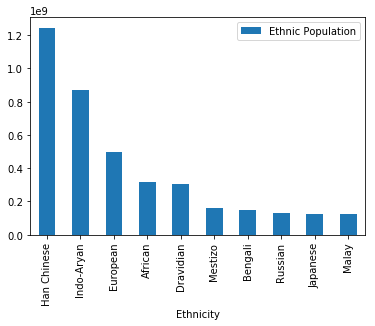

In [403]:
(new_df2.sort_values(by='Ethnic Population', ascending = False).head(10)).plot.bar(x='Ethnicity',y='Ethnic Population');
plt.show()

# Answer 4
The question of finding the longest river, largest lake, and highest airport was solved using three functions. The first function, maxElement, was a list comprehension that returned the max value after the path of an element had been entered. The second function, countryCode, called the maxElement function and used the returned value in a conditional statement in order to identify the country code associated with the value of the maximum value in the list. Then theCountry function used the value returned by the 'countryCode' function to identify the associated country/countries. 'theCountry' function was then called three times with necessary parameters in order to identify answer the three parts of the question.

In [363]:
#Function takes the path of the element like 'airport/elevation' and returns the maximum value in the list

def maxElement(eleName):
    return max([float(x.text) for x in document.findall(eleName) if x.text])

#Function takes an element to search on like 'airport' or 'river' in the first position, and the measure like
#'length' or 'elevation' in the second position, with the last position having a default of country. It returns
#the country code associated with the maximum element

def countryCode (searchEl,numericEl,countryEl = 'country'):
    thisMax = maxElement(searchEl + '/' + numericEl)
    for sEle in document.findall(searchEl):
        try:
            if (sEle.find(numericEl).text) and (thisMax == float(sEle.find(numericEl).text)):
                print ('Name: ' + sEle.find('name').text)
                return (sEle.attrib.get(countryEl))
        except:
            pass

#Function takes an element to search on like 'airport' or 'river' in the first position, and the measure like
#'length' or 'elevation' in the second position, with the last position having a default of country. It returns
#the name and country associated with the maximum element and country code(s).

def theCountry(theEle, nEl, tCntry = 'country'):
    cCode = countryCode(theEle,nEl)
    for theCode in document.findall(tCntry):
        try:
            if (theCode.find('name').text) and (cCode == theCode.attrib.get('car_code')):
                print ('Country: ' + theCode.find('name').text)
            else:
                cList = cCode.split()
                for code in cList:
                    if (theCode.find('name').text) and (code == theCode.attrib.get('car_code')):
                        print ('Country: ' + theCode.find('name').text)
        except:
            pass

In [362]:
theCountry('river', 'length')

Name: Amazonas
Country: Colombia
Country: Brazil
Country: Peru


In [364]:
theCountry('lake', 'area')

Name: Caspian Sea
Country: Russia
Country: Iran
Country: Turkmenistan
Country: Azerbaijan
Country: Kazakhstan


In [365]:
theCountry('airport', 'elevation')

Name: El Alto Intl
Country: Bolivia
